# Watershed hierarchies

Simple demonstration of how to compute hierarchies of watersheds.

Just some preliminary import and jupyter magic:

In [1]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
from utils import * # tic toc imshow

import higra as hg

Our demonstration image:

Image size: (321, 481)


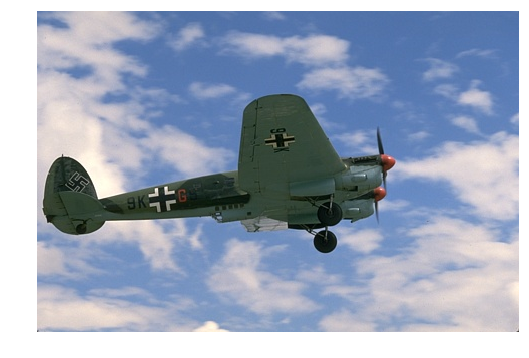

In [2]:
image = imageio.imread("data/3063.ppm")
# switch to float to avoir numerical issue with uint8
image = image.astype(np.float32)/255 
# discard the color channel
size = image.shape[:2]
print("Image size:", size)
imshow(image)

Compute image gradient

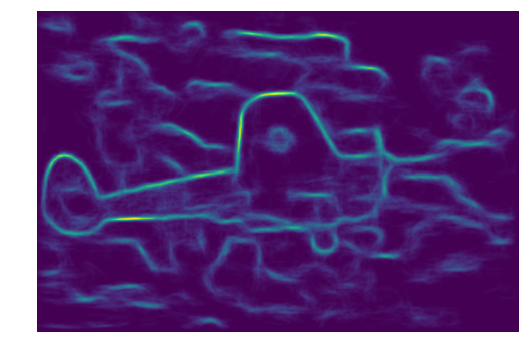

In [3]:
try: # if opencv is installed compute the gradient
    import cv2
    detector = cv2.ximgproc.createStructuredEdgeDetection("data/opencv_sed_model.yml.gz")
    gradient_image = detector.detectEdges(image)
except: # otherwise use pre-computed result
    gradient_image = imageio.imread("data/3063_SED.png")
    gradient_image = gradient_image.astype(np.float32)/255
    
imshow(gradient_image)

Contruct an edge weighted graph, and transfer gradient to edge weights

In [4]:
graph = hg.get_4_adjacency_graph(size)
edge_weights = hg.weight_graph(graph, gradient_image, hg.WeightFunction.mean)

## Watershed hierarchy by area

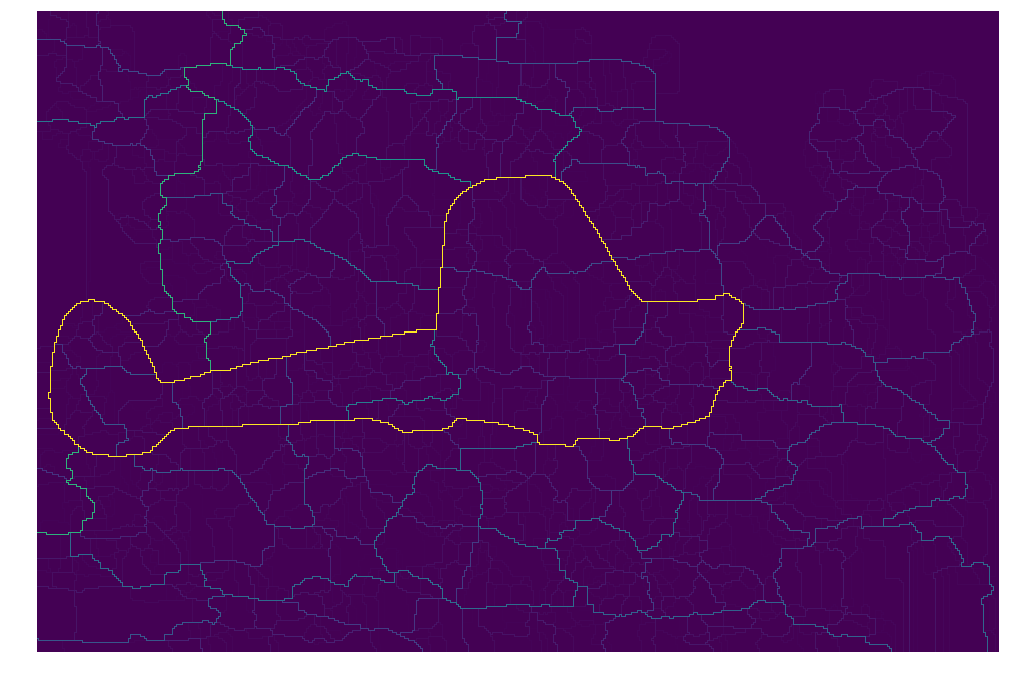

In [5]:
tree = hg.watershed_hierarchy_by_area(graph)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, edge_weights = hg.saliency(tree)) ** 0.5)

## Watershed hierarchy by volume

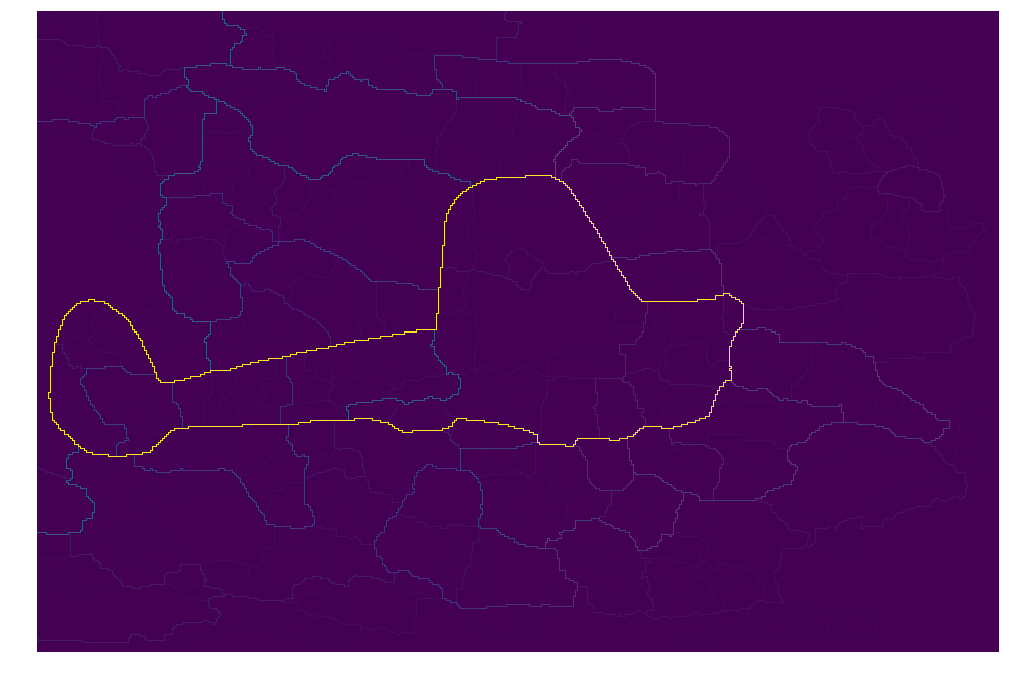

In [6]:
tree = hg.watershed_hierarchy_by_volume(graph)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, edge_weights = hg.saliency(tree)) ** 0.5)

## Watershed hierarchy by dynamics

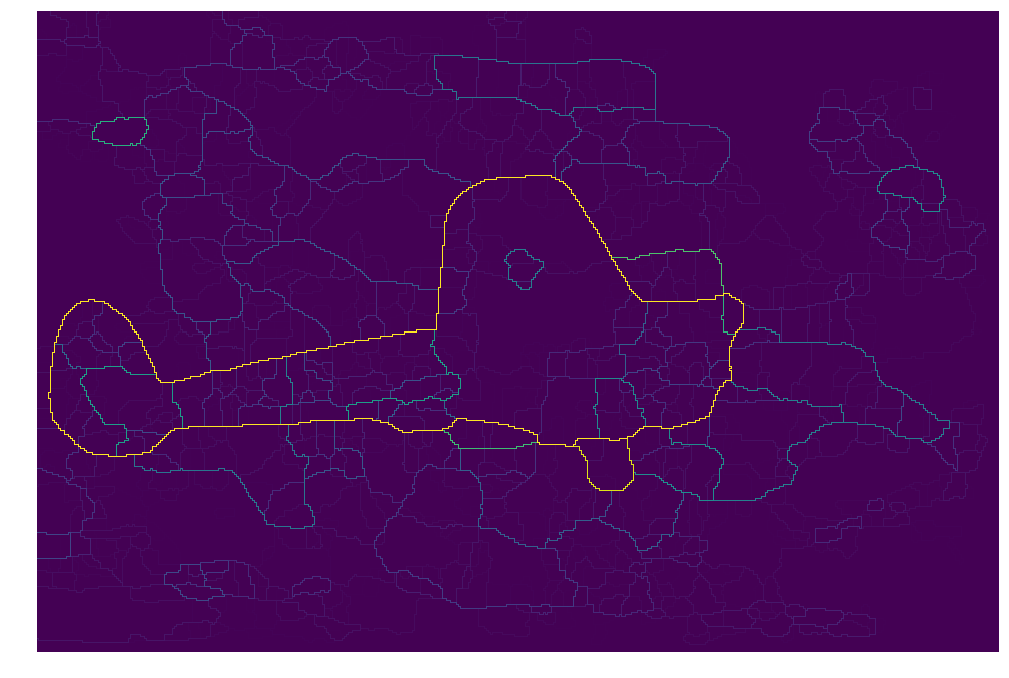

In [7]:
tree = hg.watershed_hierarchy_by_dynamics(graph)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, edge_weights = hg.saliency(tree)))

## Watershed hierarchy by user provided attribute

The attribute used to computed the watershed hierarchy can be provided by an adapted functor, for example the watershed by area can be computed equivalently with:

In [ ]:
tree = hg.watershed_hierarchy_by_attribute(graph, lambda tree: hg.attribute_area(tree))
imshow(hg.graph_4_adjacency_2_khalimsky(graph, edge_weights = hg.saliency(tree)))

In [ ]:
help()